In [1]:
def get_book_text (script_url, file_name):
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(script_url)
    script_div=driver.find_element(By.CLASS_NAME, 'scrtext')
    f = open("movie_transcripts/"+file_name+".txt", "w")
    f.write(script_div.text)
    f.close()



In [15]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
phrase_matcher = PhraseMatcher(nlp.vocab)

countries = [nlp.make_doc(text) for text in ['Canada', 'United States', 'Mexico']]
days = [nlp.make_doc(text) for text in ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                        'Friday', 'Saturday', 'Sunday']]

phrase_matcher.add("COUNTRIES",None, *countries)
phrase_matcher.add("DAYS",None, *days)


text = 'On Monday I travelled to Canada.'
doc = nlp(text)
matches = phrase_matcher(doc)
matches

[(14900075562766503986, 1, 2), (2988880774438019688, 5, 6)]

# Load libraries

In [5]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx 

import matplotlib.pyplot as plt

In [6]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 16.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\Arina Lavrova\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
NER=spacy.load("en_core_web_sm")

# Load books

In [8]:
import os

# get all book files in the data directionary
all_books= [b for b in os.scandir('data/books') if '.txt' in b.name]

In [9]:
all_books

[<DirEntry '4 - The Two Towers BOOK TWO.txt'>,
 <DirEntry '6 - The Return Of The King BOOK TWO.txt'>]

In [10]:
book=all_books[1]
book_text=open(book).read()
book_doc=NER(book_text)

In [13]:
#visualize identified entities
displacy.render(book_doc, style="ent", jupyter=True)

# Load Character Names

In [13]:
character_df=pd.read_csv("characters_list.csv")

In [14]:
import re
character_df["character_firstname"]=character_df["character_name"].apply(lambda x: x.split(' ', 1)[0])

In [15]:
pd.set_option('display.max_rows', None)
character_df

character_key             character_name  \
0               0              Albert Dreary   
1               1         Aragorn II Elessar   
2               2                   Arathorn   
3               3                      Arwen   
4               4                      Balin   
5               5         Barliman Butterbur   
6               6            Belladonna Took   
7               7              Bilbo Baggins   
8               8                    Boromir   
9               9              Bungo Baggins   
10             10                   Celeborn   
11             11                     Círdan   
12             12                     Déagol   
13             13                Denethor II   
14             14               Durin's Bane   
15             15                   Eärendil   
16             16                Ecthelion I   
17             17                    Elendil   
18             18                     Elrond   
19             19          Everard Proudfoot   
20             20              Farmer Maggot   
21             21              Frodo Baggins   
22             22                     Fundin   
23             23                  Galadriel   
24             24                    Gandalf   
25             25                  Gil-galad   
26             26                    Gilraen   
27             27                      Gimli   
28             28                      Glóin   
29             29                     Gollum   
30             30                    Gwaihir   
31             31                     Haldir   
32             32             Hamfast Gamgee   
33             33                    Isildur   
34             34                     Khamûl   
35             35                    Legolas   
36             36  Lobelia Sackville-Baggins   
37             37                      Lurtz   
38             38        Meriadoc Brandybuck   
39             39                    Morgoth   
40             40           Mrs. Bracegirdle   
41             41                 Old Noakes   
42             42     Otho Sackville-Baggins   
43             43              Peregrin Took   
44             44               Rosie Cotton   
45             45             Samwise Gamgee   
46             46                    Saruman   
47             47                     Sauron   
48             48                      Smaug   
49             49               Ted Sandyman   
50             50      Thorin II Oakenshield   
51             51                  Thranduil   
52             52     Tom, Bert, and William   
53             53       Witch-king of Angmar   
54             54                      Aldor   
55             55                    Barahir   
56             56                      Éomer   
57             57                     Éomund   
58             58                    Éothain   
59             59                      Éowyn   
60             60                    Faramir   
61             61                      Freda   
62             62                    Gamling   
63             63                     Gárulf   
64             64           Gríma Wormtongue   
65             65                  Grishnákh   
66             66                     Haleth   
67             67                       Háma   
68             68            Helm Hammerhand   
69             69                     Madril   
70             70                     Mauhúr   
71             71                     Morwen   
72             72                  Shadowfax   
73             73                     Sharku   
74             74                     Shelob   
75             75                      Snaga   
76             76                    Thengel   
77             77                    Théoden   
78             78                   Théodred   
79             79                   Théodwyn   
80             80                  Treebeard   
81             81                      Uglúk   

                   

# Get named entity liest per sentence

In [16]:
sent_entity_df=[]
# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents: 
    entity_list=[ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
sent_entity_df=pd.DataFrame(sent_entity_df) 

In [17]:
sent_entity_df

sentence  \
0     (FOREWORD, \n\n, This, tale, grew, in, the, te...   
1                      (It, was, begun, soon, after, _)   
2     (The, Hobbit, _, was, written, and, before, it...   
3     (I, desired, to, do, this, for, my, own, satis...   
4     (When, those, whose, advice, and, opinion, I, ...   
5                                      (no, hope, ,, _)   
6     (I, went, back, to, the, sequel, ,, encouraged...   
7     (But, the, story, was, drawn, irresistibly, to...   
8     (The, process, had, begun, in, the, writing, o...   
9     (The, Hobbit, ,, _, in, which, there, were, al...   
10    (The, discovery, of, the, significance, of, th...   
11    (Those, who, had, asked, for, more, informatio...   
12    (The, Lord, of, the, Rings, _, went, on, at, i...   
13    (The, delay, was, ,, of, course, ,, also, incr...   
14    (In, spite, of, the, darkness, of, the, next, ...   
15           (There, I, halted, for, a, long, while, .)   
16    (It, was, almost, a, year, later, when, I, wen...   
17    (In, the, next, year, I, wrote, the, first, dr...   
18    (Foresight, had, failed, and, there, was, no, ...   
19    (It, was, during, 1944, that, ,, leaving, the,...   
20    (These, chapters, ,, eventually, to, become, B...   
21    (Nonetheless, it, took, another, five, years, ...   
22    (Then, when, the, ', end, ', had, at, last, be...   
23    (And, it, had, to, be, typed, ,, and, re, -, t...   
24                                                  (_)   
25    (The, Lord, of, the, Rings, _, has, been, read...   
26    (The, prime, motive, was, the, desire, of, a, ...   
27    (As, a, guide, I, had, only, my, own, feelings...   
28    (Some, who, have, read, the, book, ,, or, at, ...   
29    (But, even, from, the, points, of, view, of, m...   
30    (It, is, perhaps, not, possible, in, a, long, ...   
31    (The, most, critical, reader, of, all, ,, myse...   
32    (As, for, any, inner, meaning, or, ', message,...   
33      (It, is, neither, allegorical, nor, topical, .)   
34    (As, the, story, grew, it, put, down, roots, (...   
35                                  (The, Hobbit, ., _)   
36    (The, crucial, chapter, ,, ", The, Shadow, of,...   
37    (It, was, written, long, before, the, foreshad...   
38    (Its, sources, are, things, long, before, in, ...   
39    (The, real, war, does, not, resemble, the, leg...   
40    (If, it, had, inspired, or, directed, the, dev...   
41    (Saruman, ,, failing, to, get, possession, of,...   
42    (In, that, conflict, both, sides, would, have,...   
43    (Other, arrangements, could, be, devised, acco...   
44    (But, I, cordially, dislike, allegory, in, all...   
45    (I, much, prefer, history, ,, true, or, feigne...   
46    (I, think, that, many, confuse, ', applicabili...   
47    (An, author, can, not, of, course, remain, who...   
48    (It, is, also, false, ,, though, naturally, at...   
49    (One, has, indeed, personally, to, come, under...   
50    (By, 1918, all, but, one, of, my, close, frien...   
51    (Or, to, take, a, less, grievous, matter, :, i...   
52                                   (It, does, not, .)   
53    (It, is, an, essential, part, of, the, plot, ,...   
54    (It, has, indeed, some, basis, in, experience,...   
55    (The, country, in, which, I, lived, in, childh...   
56    (Recently, I, saw, in, a, paper, a, picture, o...   
57    (I, never, liked, the, looks, of, the, Young, ...   
58                                                  (_)   
59    (The, Lord, of, the, Rings, _, is, now, issued...   
60    (A, number, of, errors, and, inconsistencies, ...   
61    (I, have, considered, all, their, comments, an...   
62    (In, the, meantime, this, edition, offers, thi...   
63    (This, index, is, in, intention, complete, in,...   
64    (A, complete, index, ,, making, full, use, of,...   
65                                     (PROLOGUE, \n\n)   
66    (This, book, is, largely, concerned, with, Hob...   
67    (Further, information, will, 

In [19]:
# function to filter out non-character entitnies
import os
def filter_entity(ent_list, character_df): 
    return [ent for ent in ent_list
            if ent in list(character_df.character_name)
            or ent in list(character_df.character_firstname)
           ]

In [20]:
filter_entity(["Frodo", "Gendalf"], character_df)

['Frodo']

In [21]:
sent_entity_df['character_enities']=sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# filter out sentences that don't have any character enitites
sent_entity_df_filtered= sent_entity_df[sent_entity_df['character_enities'].map(len)>0]

#get only first name
sent_entity_df_filtered['character_enities']=sent_entity_df_filtered['character_enities'].apply(lambda x: [item.split()[0] for item in x])
sent_entity_df_filtered


C:\Users\Arina Lavrova\AppData\Local\Temp\ipykernel_22680\1428094987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_enities']=sent_entity_df_filtered['character_enities'].apply(lambda x: [item.split()[0] for item in x])


sentence  \
14    (In, spite, of, the, darkness, of, the, next, ...   
40    (If, it, had, inspired, or, directed, the, dev...   
53    (It, is, an, essential, part, of, the, plot, ,...   
57    (I, never, liked, the, looks, of, the, Young, ...   
69    (That, story, was, derived, from, the, earlier...   
97    (But, in, the, days, of, Bilbo, ,, and, of, Fr...   
99    (Of, their, original, home, the, Hobbits, in, ...   
120   (Even, in, Bilbo, 's, time, the, strong, Fallo...   
124   (Most, of, their, earlier, settlements, had, l...   
145   (In, olden, days, they, had, ,, of, course, ,,...   
158   (Actually, in, the, Shire, in, Bilbo, 's, days...   
186   ((, Bilbo, and, Frodo, Baggins, were, as, bach...   
197   (All, that, could, be, discovered, about, it, ...   
215   (From, that, land, it, must, have, been, carri...   
247   (Few, heeded, the, sign, ,, and, not, even, Bi...   
251   (As, is, told, in, The, Hobbit, ,, there, came...   
254   (Yet, ,, though, before, all, was, won, the, B...   
255   (The, party, was, assailed, by, Orcs, in, a, h...   
259   (Bilbo, went, on, down, to, the, roots, of, th...   
260   (At, the, bottom, of, the, tunnel, lay, a, col...   
266   (Maybe, he, would, have, attacked, Bilbo, at, ...   
267   (So, to, gain, time, Gollum, challenged, Bilbo...   
269   (Bilbo, accepted, the, challenge, ;, and, they...   
270   (In, the, end, Bilbo, won, the, game, ,, more,...   
273   (The, Authorities, ,, it, is, true, ,, differ,...   
274   (And, Bilbo, pressed, him, to, keep, his, word...   
275   (But, after, ages, alone, in, the, dark, Gollu...   
276   (He, slipped, away, ,, and, returned, to, the,...   
280   (His, screech, sent, a, shiver, down, Bilbo, '...   
281   (But, Gollum, had, at, last, leaped, to, a, gu...   
287   (Just, in, time, Bilbo, saw, his, peril, ,, an...   
289   (So, it, was, that, Gollum, passed, him, witho...   
290   (Warily, Bilbo, followed, him, ,, as, he, went...   
292   (There, Gollum, crouched, at, bay, ,, smelling...   
294   (In, the, end, ,, gathering, his, courage, ,, ...   
298   (Now, it, is, a, curious, fact, that, this, is...   
299   (To, them, his, account, was, that, Gollum, ha...   
300   (Bilbo, guessed, that, this, was, the, very, r...   
301   (But, being, in, a, tight, place, ,, he, said,...   
302   (This, account, Bilbo, set, down, in, his, mem...   
305   (Gandalf, ,, however, ,, disbelieved, Bilbo, '...   
306   (Eventually, he, got, the, true, tale, out, of...   
307   (Though, he, did, not, say, so, to, Bilbo, ,, ...   
309   (It, was, suggested, to, Bilbo, ,, as, he, con...   
310   (That, also, Gandalf, thought, strange, and, s...   
311   (Of, Bilbo, 's, later, adventures, little, mor...   
315   (Only, to, Frodo, did, he, show, the, account,...   
316   (His, sword, ,, Sting, ,, Bilbo, hung, over, h...   
326   (It, was, in, origin, Bilbo, 's, private, diar...   
328   (But, annexed, to, it, and, preserved, with, i...   
332   (It, was, kept, at, Great, Smials, ,, but, it,...   
338   (The, full, tale, is, stated, to, have, been, ...   
341   (But, since, they, were, little, used, by, Fro...   
344   (Some, of, these, were, composed, or, begun, b...   
348   (None, of, them, was, written, by, Peregrin, ,...   
349   (Only, here, in, the, Shire, were, to, be, fou...   
351   (The, Tale, of, Years, _, was, put, together, ...   
353   (It, is, probable, that, Meriadoc, obtained, a...   
354   (There, ,, though, Elrond, had, departed, ,, h...   
355   (It, is, said, that, Celeborn, went, to, dwell...   
356   (---------------------------------------------...   
357   (Bilbo, was, very, rich, and, very, peculiar, ...   
369   (The, eldest, of, these, ,, and, Bilbo, 's, fa...   
370   (When, Bilbo, was, ninety, -, nine, ,, he, ado...   
371   (Bilbo, and, Frodo, happened, to, have, the, s...   
372   (', You, had, better, come, and, live, here, ,...   
373   (At, that, time, Frodo, was, still, in, his, _...   
376   (Bilbo, was, going, to, be, _

# Create relationships

In [22]:
window_size=5
relationships=[]
for i in range(sent_entity_df_filtered.index[-1]):
    end_i=min(i+5, sent_entity_df_filtered.index[-1])
    char_list=sum((sent_entity_df_filtered.loc[i: end_i].character_enities), [])
    
    #remove duplicated characters next to each other 
    char_unique=[char_list[i] for i in range(len(char_list))
                if(i==0) or char_list[i]!=char_list[i-1]]
    if len(char_unique)>1:
        for idx, a in enumerate(char_unique[:-1]):
            b=char_unique[idx+1]
            relationships.append({"source": a, "target":b})
relationships_df=pd.DataFrame(relationships)

In [23]:
relationships_df=pd.DataFrame(np.sort(relationships_df.values, axis=1), columns=relationships_df.columns)
relationships_df

source     target
0           Old    Saruman
1           Old    Saruman
2         Bilbo      Frodo
3         Bilbo      Frodo
4         Bilbo      Frodo
5         Bilbo      Frodo
6         Bilbo      Frodo
7         Bilbo      Frodo
8         Bilbo     Thorin
9         Bilbo     Thorin
10        Bilbo     Thorin
11        Bilbo     Thorin
12        Bilbo     Thorin
13        Bilbo     Thorin
14        Bilbo     Thorin
15        Bilbo     Thorin
16        Bilbo     Gollum
17        Bilbo     Gollum
18        Bilbo     Gollum
19        Bilbo     Gollum
20        Bilbo     Gollum
21        Bilbo     Gollum
22        Bilbo     Gollum
23        Bilbo     Gollum
24        Bilbo     Gollum
25        Bilbo     Gollum
26        Bilbo     Gollum
27        Bilbo     Gollum
28        Bilbo     Gollum
29        Bilbo     Gollum
30        Bilbo     Gollum
31        Bilbo     Gollum
32        Bilbo     Gollum
33        Bilbo     Gollum
34        Bilbo     Gollum
35        Bilbo     Gollum
36        Bilbo     Gollum
37        Bilbo     Gollum
38        Bilbo     Gollum
39        Bilbo     Gollum
40        Bilbo     Gollum
41        Bilbo     Gollum
42        Bilbo     Gollum
43        Bilbo     Gollum
44        Bilbo     Gollum
45        Bilbo     Gollum
46        Bilbo     Gollum
47        Bilbo     Gollum
48        Bilbo     Gollum
49        Bilbo     Gollum
50        Bilbo     Gollum
51        Bilbo     Gollum
52        Bilbo     Gollum
53        Bilbo     Gollum
54        Bilbo     Gollum
55        Bilbo     Gollum
56        Bilbo     Gollum
57        Bilbo     Gollum
58        Bilbo     Gollum
59        Bilbo     Gollum
60        Bilbo     Gollum
61        Bilbo     Gollum
62        Bilbo     Gollum
63        Bilbo     Gollum
64        Bilbo     Gollum
65        Bilbo     Gollum
66        Bilbo     Gollum
67        Bilbo     Gollum
68        Bilbo     Gollum
69        Bilbo     Gollum
70        Bilbo     Gollum
71        Bilbo     Gollum
72        Bilbo     Gollum
73        Bilbo     Gollum
74        Bilbo     Gollum
75        Bilbo     Gollum
76        Bilbo     Gollum
77        Bilbo     Gollum
78        Bilbo     Gollum
79        Bilbo     Gollum
80        Bilbo     Gollum
81        Bilbo     Gollum
82        Bilbo     Gollum
83        Bilbo     Gollum
84        Bilbo     Gollum
85        Bilbo     Gollum
86        Bilbo     Gollum
87        Bilbo     Gollum
88        Bilbo     Gollum
89        Bilbo     Gollum
90        Bilbo     Gollum
91        Bilbo     Gollum
92        Bilbo     Gollum
93        Bilbo     Gollum
94        Bilbo     Gollum
95        Bilbo     Gollum
96        Bilbo     Gollum
97        Bilbo     Gollum
98        Bilbo     Gollum
99        Bilbo     Gollum
100       Bilbo     Gollum
101       Bilbo     Gollum
102       Bilbo     Gollum
103       Bilbo     Gollum
104     Gandalf     Gollum
105       Bilbo     Gollum
106     Gandalf     Gollum
107       Bilbo    Gandalf
108       Bilbo     Gollum
109     Gandalf     Gollum
110       Bilbo    Gandalf
111       Bilbo     Gollum
112     Gandalf     Gollum
113       Bilbo    Gandalf
114       Bilbo     Gollum
115     Gandalf     Gollum
116       Bilbo    Gandalf
117       Bilbo    Gandalf
118       Bilbo      Frodo
119       Bilbo      Frodo
120       Bilbo      Frodo
121       Bilbo      Frodo
122       Bilbo      Frodo
123       Bilbo      Frodo
124       Bilbo      Frodo
125       Bilbo   Peregrin
126       Bilbo   Peregrin
127     Barahir      Frodo
128     Barahir      Frodo
129     Barahir      Frodo
130       Frodo   Meriadoc
131       Frodo   Meriadoc
132       Frodo   Meriadoc
133     Elendil   Meriadoc
134     Elendil   Meriadoc
135     Elendil     Sauron
136     Elendil     Sauron
137     Elendil     Sauron
138    Meriadoc     Sauron
139     Elendil     Sauron
140    Meriadoc     Sauron
141     Elendil     Sauron
142    Meriadoc     Sauron
143    Meriadoc     Sauron
144      Elrond   Meriadoc
145      Elrond   Meriadoc
146    Celeborn     Elrond
147    Celebo

In [24]:
relationships_df["value"]=1
relationships_df=relationships_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [25]:
relationships_df

source     target  value
0          Old    Saruman      2
1        Bilbo      Frodo    594
2        Bilbo     Thorin     17
3        Bilbo     Gollum    167
4      Gandalf     Gollum     29
5        Bilbo    Gandalf    228
6        Bilbo   Peregrin      7
7      Barahir      Frodo      3
8        Frodo   Meriadoc      3
9      Elendil   Meriadoc      2
10     Elendil     Sauron     11
11    Meriadoc     Sauron      4
12      Elrond   Meriadoc      5
13    Celeborn     Elrond      5
14    Celeborn  Galadriel      6
15       Bilbo  Galadriel      5
16       Bilbo        Old      4
17       Frodo        Old      5
18       Bilbo       Otho     15
19     Lobelia       Otho     16
20       Bilbo    Lobelia     18
21       Frodo    Gandalf    413
22       Frodo    Lobelia     38
23       Frodo       Otho     13
24    Meriadoc   Peregrin      6
25       Bilbo   Meriadoc      4
26       Frodo        Ted      5
27       Bilbo        Ted     12
28       Bilbo    Saruman      5
29       Frodo    Saruman     17
30   Gil-galad     Sauron     17
31     Isildur     Sauron     24
32       Frodo     Gollum     34
33       Frodo    Isildur      4
34      Gollum    Isildur     16
35     Elendil      Frodo      6
36       Frodo     Sauron     12
37      Farmer      Frodo     15
38      Farmer   Peregrin      5
39       Frodo   Peregrin     10
40    Barliman      Frodo     18
41    Arathorn      Frodo     11
42      Elrond      Frodo     87
43       Frodo  Gil-galad      8
44      Elrond  Gil-galad     18
45     Barahir     Sauron      3
46      Elrond    Gandalf     58
47      Elrond     Sauron     24
48    Barliman    Gandalf      6
49     Aragorn    Gandalf     26
50     Aragorn   Arathorn     12
51     Aragorn      Frodo      7
52       Arwen      Frodo      9
53       Arwen     Elrond      6
54       Bilbo     Elrond     30
55       Balin      Frodo      7
56       Arwen    Gandalf      3
57       Arwen      Bilbo      4
58       Frodo      Gimli     13
59      Elrond      Gimli     23
60      Elrond    Legolas      5
61     Legolas  Thranduil     12
62       Frodo  Thranduil      1
63     Boromir    Gandalf     56
64     Boromir      Frodo     32
65     Elendil  Gil-galad     18
66     Boromir    Isildur     19
67      Elrond    Isildur      7
68   Gil-galad    Isildur     11
69    Denethor     Elrond      3
70     Boromir     Elrond     24
71    Arathorn    Boromir      5
72    Arathorn     Elrond      6
73       Bilbo    Boromir      9
74     Boromir    Elendil      4
75    Denethor    Elendil      6
76    Denethor    Isildur      5
77      Elrond     Gollum      7
78      Elrond    Saruman     10
79     Saruman     Sauron     37
80     Aragorn    Isildur     11
81     Aragorn     Gollum     17
82     Gandalf    Isildur     11
83      Gollum    Saruman      8
84     Isildur    Saruman     10
85    Denethor    Saruman      5
86     Boromir   Denethor      4
87     Boromir    Saruman     22
88    Denethor     Sauron      5
89     Aragorn   Denethor      6
90     Boromir     Gollum      7
91      Gollum     Sauron      1
92     Legolas     Sauron      5
93      Gollum    Legolas     14
94     Aragorn  Thranduil      3
95     Gandalf    Legolas     15
96     Gandalf     Sauron      8
97     Gandalf    Saruman     11
98      Gollum    Gwaihir      4
99     Gwaihir    Saruman     13
100    Boromir     Sauron     11
101    Aragorn  Shadowfax      1
102      Frodo  Shadowfax      3
103      Balin     Elrond      1
104      Balin    Gandalf      6
105    Gandalf     Thorin      5
106    Gandalf   Peregrin      6
107      Bilbo    Legolas      3
108    Gandalf    Gwaihir      4
109      Bilbo    Gwaihir      4
110     Elrond  Thranduil      7
111    Aragorn     Elrond      5
112      Gimli    Legolas     14
113   Arathorn      Gimli      4
114     Elrond   Peregrin      4
115   Arathorn      Bilbo      2
116      Frodo     Thorin      2
117    Boromir    Legolas     28
118      Frodo    Legolas     14
119    Gandalf      Gimli     16
120    Aragorn 

# Graph visualisation

In [26]:
# Create a graph from a pandas dataframe
G =nx.from_pandas_edgelist(relationships_df,
                          source="source",
                          target="target", 
                          edge_attr="value",
                          create_using=nx.Graph())

## Graph visualisation

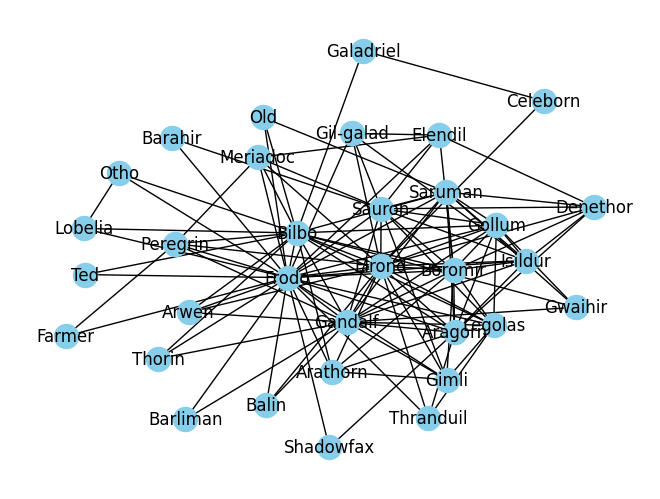

In [27]:
pos= nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

## Graph visualization Python - Pyvis

In [28]:
from pyvis.network import Network
net= Network(notebook = True, width="1000px", height="700px", bgcolor="#fff4c2", font_color="#105728")

node_degree=dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("lord_of_rings.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## The most important characters in LOTR

In [29]:
# Degree centrality
degree_dict=nx.degree_centrality(G)
degree_dict

{'Old': 0.09375,
 'Saruman': 0.375,
 'Bilbo': 0.59375,
 'Frodo': 0.875,
 'Thorin': 0.09375,
 'Gollum': 0.34375,
 'Gandalf': 0.53125,
 'Peregrin': 0.1875,
 'Barahir': 0.0625,
 'Meriadoc': 0.1875,
 'Elendil': 0.1875,
 'Sauron': 0.4375,
 'Elrond': 0.625,
 'Celeborn': 0.0625,
 'Galadriel': 0.0625,
 'Otho': 0.09375,
 'Lobelia': 0.09375,
 'Ted': 0.0625,
 'Gil-galad': 0.15625,
 'Isildur': 0.3125,
 'Farmer': 0.0625,
 'Barliman': 0.0625,
 'Arathorn': 0.1875,
 'Aragorn': 0.375,
 'Arwen': 0.125,
 'Balin': 0.09375,
 'Gimli': 0.21875,
 'Legolas': 0.28125,
 'Thranduil': 0.125,
 'Boromir': 0.4375,
 'Denethor': 0.21875,
 'Gwaihir': 0.125,
 'Shadowfax': 0.0625}

<AxesSubplot: >

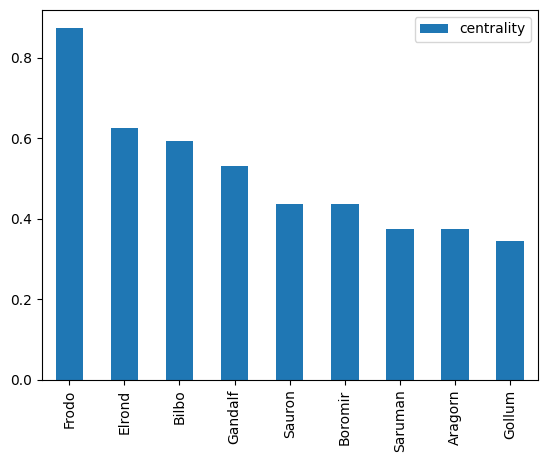

In [30]:
degree_df=pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
#Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

## Community detection

In [191]:
import community as community_louvain

communities= community_louvain.best_partition(G)

nx.set_node_attributes(G, communities, 'group')

In [196]:
com_net= Network(notebook = True, width="1000px", height="700px", bgcolor="#fff4c2", font_color="#105728")
com_net.from_nx(G)
com_net.show("lord_of_rings_comminities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Check entities with characters

In [55]:
import csv
field_names = ['sentence', 'entities']
with open('sent_entity_df.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = field_names)
    writer.writeheader()
    writer.writerows(sent_entity_df)

In [54]:
sent_entity_df
import csv
field_names = ['','sentence', 'entities']
with open('sent_entity_df.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = field_names)
    writer.writeheader()
    writer.writerows(sent_entity_df)
    

In [69]:
sent_entity_df['character_enities']=sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))
sent_entity_df

AttributeError: 'str' object has no attribute 'contains'